In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [2]:
os.listdir(".")

['.config', 'exam_results.csv', 'sample_data']

In [3]:
filename = "exam_results.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
score_df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

Plotting the average scores per gender. Use a Matplotlib Barplot

Plot the average scores per category of "lunch" and "pre". Use a seaborn boxplot chart.

In [6]:
math_score = score_df.groupby('gender')['math'].mean() 
math_score

gender
female    63.633205
male      68.728216
Name: math, dtype: float64

In [7]:
reading_score = score_df.groupby('gender')['reading'].mean()
reading_score

gender
female    72.608108
male      65.473029
Name: reading, dtype: float64

In [8]:
writing_score = score_df.groupby('gender')['writing'].mean()
writing_score

gender
female    72.467181
male      63.311203
Name: writing, dtype: float64

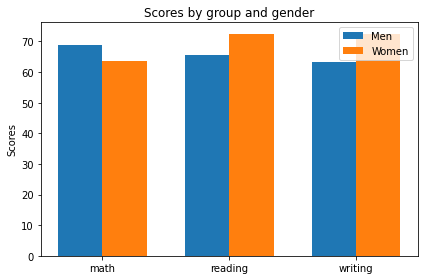

In [9]:
labels = ['math', 'reading', 'writing']
men_average = [68.7, 65.5, 63.3]
women_average = [63.6, 72.6, 72.5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_average, width, label='Men')
rects2 = ax.bar(x + width/2, women_average, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [10]:
lunch_math = score_df.groupby('lunch')['math'].mean()
lunch_math

lunch
free/reduced    58.921127
standard        70.034109
Name: math, dtype: float64

In [11]:
lunch_reading = score_df.groupby('lunch')['reading'].mean()
lunch_reading

lunch
free/reduced    64.653521
standard        71.654264
Name: reading, dtype: float64

In [12]:
lunch_writing = score_df.groupby('lunch')['writing'].mean()
lunch_writing

lunch
free/reduced    63.022535
standard        70.823256
Name: writing, dtype: float64

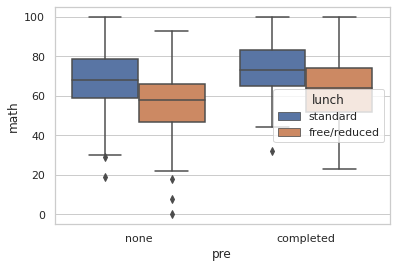

In [13]:
labels = ['math', 'reading', 'writing']
lunch_free = [58.9, 64.7, 63.0]
lunch_standard = [70.0, 71.7, 70.8]

sns.set(style='whitegrid')
ax = sns.boxplot(x = 'pre', y = 'math' , data = score_df, hue = 'lunch')

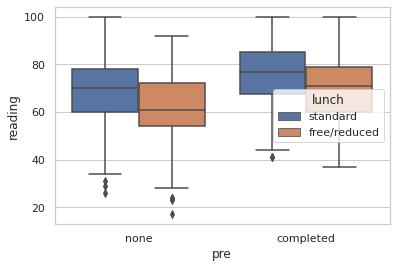

In [14]:
bx = sns.boxplot(x = 'pre', y = 'reading' , data = score_df, hue = 'lunch')

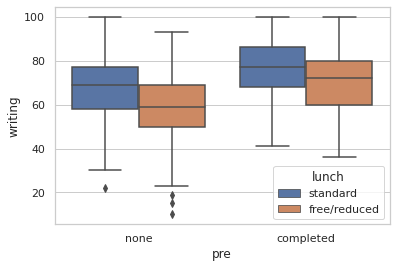

In [15]:
cx = sns.boxplot(x = 'pre', y = 'writing' , data = score_df, hue = 'lunch')